# Ads Click Prediction by Classification Machine Learning

We will use machine learning modeling to predict potential users in digital advertising on this occasion.

The business team wishes to improve their digital advertising methods in order to entice potential customers to click on a product. So that the cost incurred is not excessive.

The goal is to develop a machine learning model capable of detecting potential users who are likely to convert or be interested in an advertisement. So that we can reduce advertising costs on digital platforms.

Dataset: https://www.kaggle.com/datasets/mafrojaakter/ad-click-data

## Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
# import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# You need to install library ppscore to calculate correlation between variable
!pip install -U ppscore


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import ppscore as pps

## Load Data

In [4]:
# define dataframe
df = pd.read_csv('Ad Click Data.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,3/27/2016 0:53,No
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04/04/2016 01:39,No
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,3/13/2016 20:35,No
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,01/10/2016 02:31,No
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,06/03/2016 03:36,No


## Initial Data Information

In [5]:
# check data type each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Gender                    997 non-null    object 
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [6]:
# general observation of numerical value from dataset
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,987.000000,989.000000
mean,64.929524,36.009000,54980.667234,179.863620
std,15.844699,8.785562,13439.998510,43.870142
min,32.600000,19.000000,13996.500000,104.780000
25%,51.270000,29.000000,46947.570000,138.710000
50%,68.110000,35.000000,57009.760000,182.650000
75%,78.460000,42.000000,65479.350000,218.790000
max,91.430000,61.000000,79484.800000,267.010000


In [7]:
# general observation of categorical value from dataset
df.select_dtypes('object').describe()

,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
count,1000,999,997,991,1000,1000
unique,1000,968,2,237,997,2
top,Cloned 5thgeneration orchestration,Lisamouth,Female,France,5/26/2016 15:40,No
freq,1,3,518,9,2,500


## Exploration Data Analysis

### User Distribution

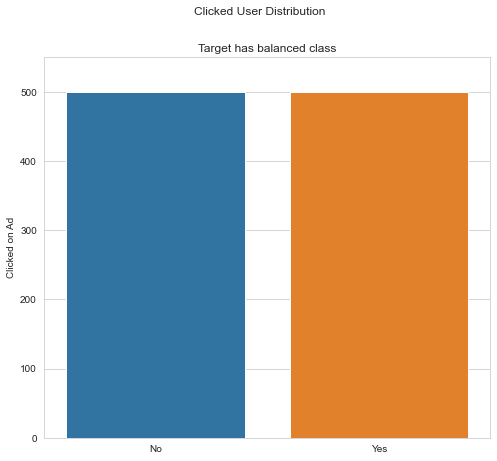

In [8]:
counts = df['Clicked on Ad'].value_counts()

plt.figure(figsize=(8,7))
sns.set_style('whitegrid')
sns.barplot(x=counts.index,y=counts)

plt.suptitle('Clicked User Distribution')
plt.title('Target has balanced class')
plt.ylim(0,550)
plt.show()

luckly the data that we will use turns out to have labels that are quite balanced so we don't need to do further preprocessing to overcome imbalanced classes.

### Distribution for Daily Internet Usage

In [9]:
yes = df[df['Clicked on Ad'] == 'Yes']
no = df[df['Clicked on Ad'] == 'No']

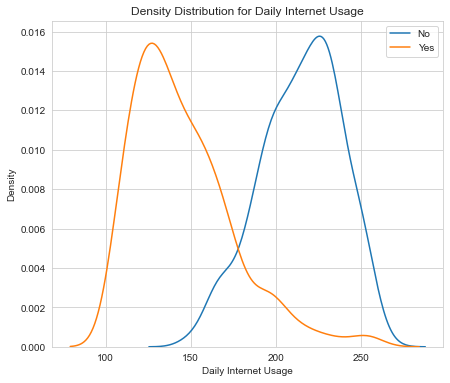

In [10]:
plt.figure(figsize=(7,6))
sns.set_style('whitegrid')
sns.kdeplot(no['Daily Internet Usage'],label='No')
sns.kdeplot(yes['Daily Internet Usage'],label='Yes')

plt.title('Density Distribution for Daily Internet Usage')
plt.legend()
plt.show()

We can see the spread of daily internet usage from the EDA above (in minutes). This distribution has a few intriguing items. that consumers who use the internet infrequently have a higher chance of clicking on a product than those who use it regularly.

This would suggest that people who use the internet infrequently tend to pay closer attention to website advertisements.

### Distribution for Daily Time Spent on Site

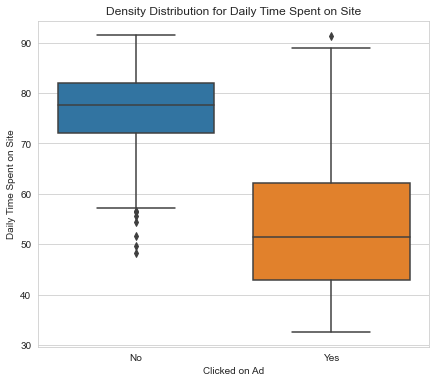

In [11]:
plt.figure(figsize=(7,6))

sns.set_style('whitegrid')
sns.boxplot(x=df['Clicked on Ad'],y=df['Daily Time Spent on Site'])

plt.title('Density Distribution for Daily Time Spent on Site')
plt.show()

because there is a distinct distribution of Internet use. We're attempting to demonstrate how a user interacts with a website. It appears from the EDA above that user duration on a website and internet consumption have a similar distribution. In other words, even a brief visit to a website might yield potential users.

### Distribution for Age

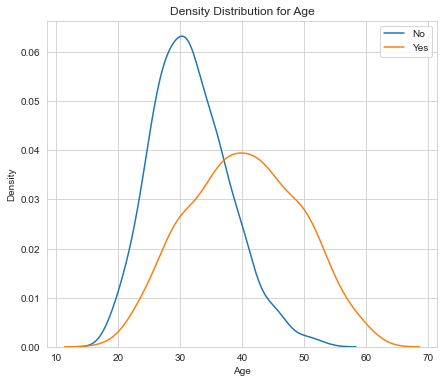

In [12]:
plt.figure(figsize=(7,6))

sns.set_style('whitegrid')
sns.kdeplot(no['Age'],label='No')
sns.kdeplot(yes['Age'],label='Yes')

plt.title('Density Distribution for Age')
plt.legend()
plt.show()

Age visualization reveals that the senior population is the potential market. Perhaps as a result of the fact that young people are considerably more picky and cautious online. Additionally, young people are quite noticeable when an advertisement is on a website.

### Internet Usage vs Time Spent on Site

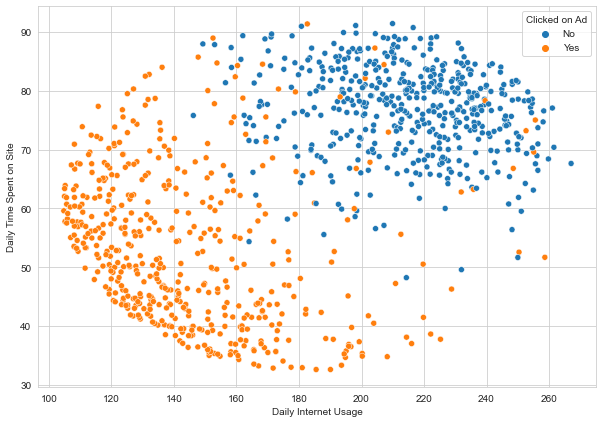

In [13]:
plt.figure(figsize=(10,7))

sns.set_style('whitegrid')
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])

plt.show()

After being aware that internet usage and the amount of time spent on a webpage are identical. We attempt to determine how the two features relate to the target.

According to this plot, internet usage and the amount of time spent on a website can be split into two categories: active users and non-active users.

These 2 parts may contain elements that have a significant impact on whether someone chooses to click on an advertisement or not. In contrast to inactive users, active users are more likely to dislike clicking on an advertisement, as shown in the visualization above.

In conclusion, we can optimize our advertising system for users who are not actively using the internet.

## Correlation

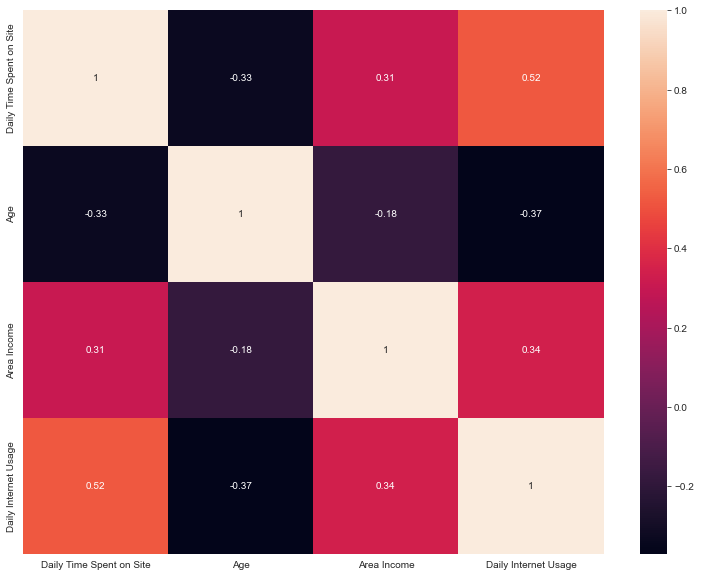

In [14]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can use all of the characteristics for modeling because there is no multicorrelation (correlation between variables) based on the aforementioned correlation. However, we are unable to determine the connection between the feature and the target using Pearson correlation. In order to determine the relationship between features and their targets, we will use PPS (Predictive Power Score) in the sections that follow.

In [15]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

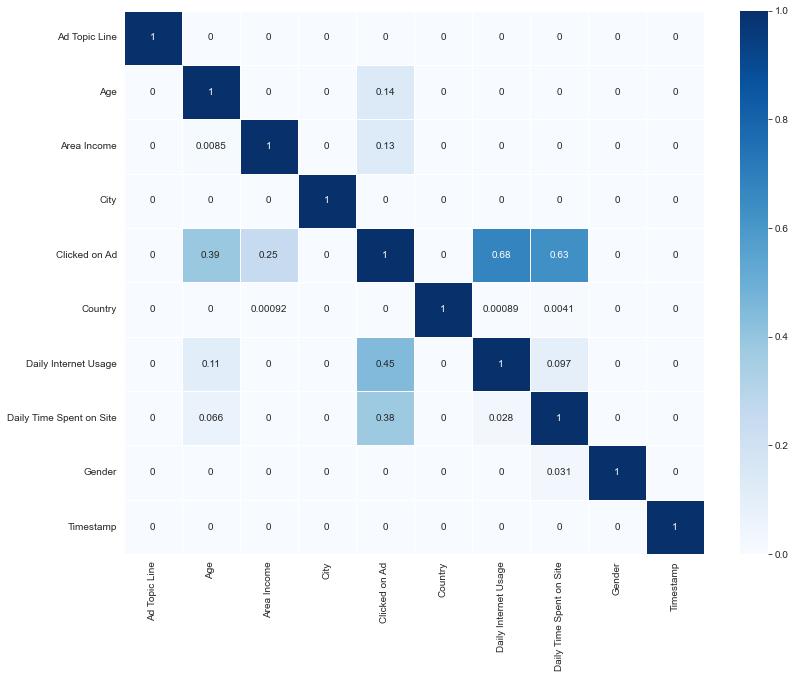

In [16]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

We will concentrate solely on the Clicked on Ad feature based on the correlation graphic created earlier using PPS. Since that variable is our intended target, we will use it.

Quite relevant characteristics to the target:

1. Internet usage every day,
2. Age, 
3. Income Area, and 
4. Daily Time Spent on Site
This correlation graphic can provide as modeling guidance.

## Data Preprocessing

In the case of data preprocessing, we need clean data so that it can be applied to several machine learning models.

The steps we need to do are:

1. Handle Missing Value
2. Extract Datetime Data
3. Split Targets and features
4. Create One-hot encoding for categorical features

In [17]:
## UDF for Feature Extraction
def extract_day_of_week(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').weekday()

def extract_day_of_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').day

def extract_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').month

### Handle Missing Value

In [18]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(),inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(),inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

### Extract Datetime Data

In [19]:
df['day_of_week'] = df['Timestamp'].apply(extract_day_of_week)
df['day_of_month'] = df['Timestamp'].apply(extract_day_of_month)
df['month'] = df['Timestamp'].apply(extract_month)

df = df.drop(labels=['Timestamp'],axis=1)

In [20]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,day_of_week,day_of_month,month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,No,6,27,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,No,0,4,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,No,6,13,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,No,6,10,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,No,4,3,6


### Split Target and Features

In [21]:
X = df.drop(labels=['Clicked on Ad'],axis=1)
y = np.where(df['Clicked on Ad']=='No',0,1)

### Get Dummies for All Categorical Features

In [22]:
X_dummy = pd.get_dummies(X)

In [23]:
X_dummy

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,day_of_week,day_of_month,month,Ad Topic Line_Adaptive 24hour Graphic Interface,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.950000,35,61833.90,256.09,6,27,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.230000,31,68441.85,193.77,0,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.470000,26,59785.94,236.50,6,13,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.150000,29,54806.18,245.89,6,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.370000,35,73889.99,225.58,4,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,3,11,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.300000,45,67782.17,134.42,4,22,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,64.929524,51,42415.72,120.37,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.550000,19,41920.79,187.95,3,24,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build Models

The modeling stage comes next, where we create a model with a high level of precision. Since the number of categories on the target we choose is balanced, we will use accuracy metrics.

The steps for modeling are as follows:

1. Dividing the test and train datasets
2. Train employs standard data (Experiment 1)
3. Workout with normalization (Experiment 2)

### Splitting Train and Test Dataset

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,test_size = 0.3,stratify=y,random_state = 123)

In [25]:
print('Dimensi Train:',X_train.shape)
print('Dimensi Test:',X_test.shape)

Dimensi Train: (700, 2214)
Dimensi Test: (300, 2214)


In [26]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

### First Experiment

In [27]:
result = experiment(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

In [28]:
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.743333,0.660000,0.792000,0.010526
1,Logistic Regression,LogisticRegression(),0.856667,0.793333,0.908397,0.115029
2,Decision Tree,DecisionTreeClassifier(),0.946667,0.926667,0.965278,0.033992
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.953333,0.940000,0.965753,0.292081
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.936667,0.920000,0.951724,0.949102


The outcome of modeling with default data is as follows (simple preprocessing). The decision tree classifier has the highest accuracy, according to the modeling findings. The random forest, however, is predicated on the highest level of precision. The accuracy obtained from some models, such as logistic regression and k-nearest neighbor, is not very excellent.

### Second Experiment

In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [30]:
result2 = experiment(X_train_minmax,X_test_minmax,y_train,y_test)
result2 = pd.DataFrame(result2)

In [31]:
result2

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.760000,0.920000,0.696970,0.000000
1,Logistic Regression,LogisticRegression(),0.936667,0.886667,0.985185,0.035720
2,Decision Tree,DecisionTreeClassifier(),0.933333,0.926667,0.939189,0.025864
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.943333,0.920000,0.965035,0.292747
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.930000,0.920000,0.938776,1.044756


However, based on this approach, we will select a random forest as the best model because it has the most accuracy and precision. After applying the min max scaler, we see considerable gains in numerous models.

### Evaluation

In [32]:
final_model = result2['model'][3]
y_pred = final_model.predict(X_test_minmax)

<Figure size 936x720 with 0 Axes>

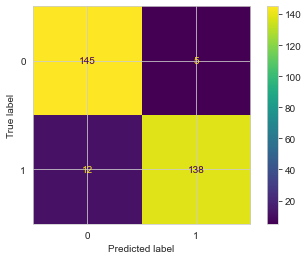

In [33]:
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
plt.figure(figsize=(13,10))
disp.plot()
plt.show()

We wish to analyze our model's performance in depth using the random forest model as a foundation.

The random forest generates a very effective confusion matrix.

We can observe that there is very little prediction error (purple cells). The accuracy, precision, and recall will be good with the findings that follow.